In [1]:
import numpy as np 
import numpy.linalg as LA
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from scipy.io import loadmat

# Homework 2 

## 1 Load the Data
+ The fifirst column is the strength [MPa]
+ the second strain to failure [%],
+ the third column is the elastic modulus [GPa]
+ stress
=
(elastic modulus)
×
strain.

In [2]:
DATA = loadmat("data.mat")
X = DATA["X"]
print(f"Shape of Data X is {X.shape}")

Shape of Data X is (30, 3)


In [3]:
# Strength
from ast import Str


Strength = X[:,0]
Strength = np.expand_dims(Strength,axis = -1)
# Strain
Strain = X[:,1]
Strain = np.expand_dims(Strain,axis=-1)
# Elastic modulus
Elastic = X[:,2]/100
Elastic = np.expand_dims(Elastic,axis = -1)
Stress = Strain * Elastic
Stress.shape,Elastic.shape

((30, 1), (30, 1))

## 1.1 Visualize Data

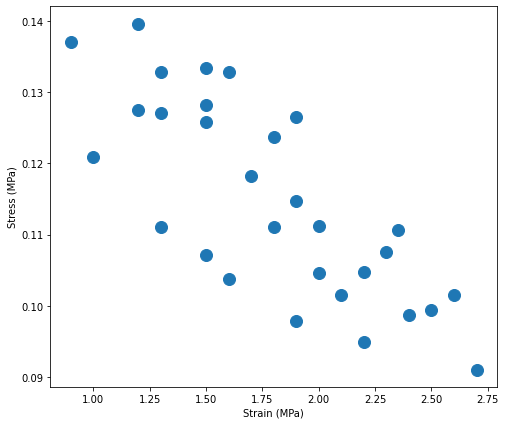

In [4]:
plt.figure(figsize=(8,7))
plt.plot(Strain,Stress,"o",markersize = 12)
plt.xlabel("Strain (MPa)")
plt.ylabel("Stress (MPa)")
plt.savefig("DataVisualize")

## 1.2 Data preprocessing: Normalization

In [5]:
# To normalize data, minus mean value and divided by standard deviation
print(f"Before normalization: The min and max value in dataset is {np.min(Stress)} ~ {np.max(Stress)}")
# Two lists to store mean and std for each type of data for recover
def Normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X = (X -mean)/std

    return X,mean,std

Stress,Mean_stress,Std_stress = Normalization(Stress)
## To prove that we have all value in same scale:
print(f"After normalization: The min and max value in dataset is {np.min(Stress)} ~ {np.max(Stress)}")


Before normalization: The min and max value in dataset is 0.09103008535174992 ~ 0.13966205284397537
After normalization: The min and max value in dataset is -1.743249679181587 ~ 1.8187515575392719


# 2 K-Means Algorithm

In [6]:
class KMeans:
    def __init__(self,k):
    # Number of K 
        self.k = k 
    def train(self,X,MaxIter=1500,TOL=1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in np.arange(MaxIter):
            # L1 norm 
            dist = LA.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in np.arange(1,self.k):
                dist = np.append( dist,LA.norm(X-centroids[class_,:],axis=1).reshape(-1,1) ,axis=1)
            
            ## Sort out the class by choose the argmin
            classes =np.argmin(dist,axis=1)

            # Update new position of centriod by computing mean value
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes==class_,:],axis=0)
            # tolerance
            if LA.norm(centroids-centroidsold) <= TOL:
                print("Centroid has been converged")
                break
        # save the final centroids
        self.centroids = centroids

    def predict(self,X):
        dist = LA.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)   
        for class_ in range(1,self.k):
            dist = np.append( dist,LA.norm(X-self.centroids[class_,:],axis=1).reshape(-1,1) ,axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

In [7]:
kmean = KMeans(3)
kmean.train(Stress)
classes=kmean.predict(Stress)
classes_copy = classes.copy()
centroid = kmean.centroids

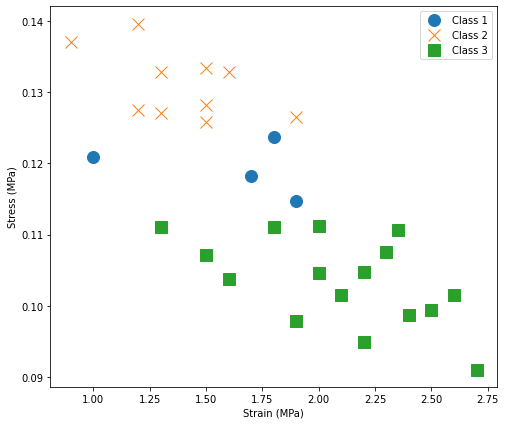

In [8]:

# Rescale Data to original scale
Stress_re = Stress*Std_stress + Mean_stress
plt.figure(figsize=(8,7))
plt.plot(Strain[classes==0],Stress_re[classes==0],"o",markersize = 12,label="Class 1")
plt.plot(Strain[classes==1],Stress_re[classes==1],"x",markersize = 12,label="Class 2")
plt.plot(Strain[classes==2],Stress_re[classes==2],"s",markersize = 12,label="Class 3")
plt.legend()
plt.xlabel("Strain (MPa)")
plt.ylabel("Stress (MPa)")

plt.savefig("KMeans")

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init="random")
classes =kmeans.fit_predict(Stress)
centers = kmeans.cluster_centers_

In [10]:
np.mean(classes == classes_copy)

0.7666666666666667

Text(0, 0.5, 'Stress (MPa)')

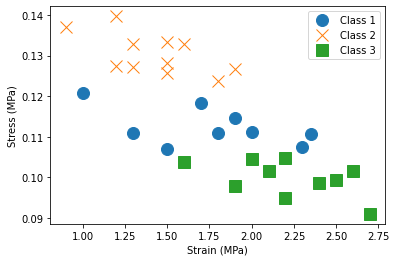

In [11]:
Stress_re = Stress*Std_stress + Mean_stress
plt.plot(Strain[classes==0],Stress_re[classes==0],"o",markersize = 12,label="Class 1")
plt.plot(Strain[classes==1],Stress_re[classes==1],"x",markersize = 12,label="Class 2")
plt.plot(Strain[classes==2],Stress_re[classes==2],"s",markersize = 12,label="Class 3")
plt.legend()
plt.xlabel("Strain (MPa)")
plt.ylabel("Stress (MPa)")


In [32]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3,compute_distances=True)

T = agg.fit_predict(Stress)

Text(0, 0.5, 'Stress (MPa)')

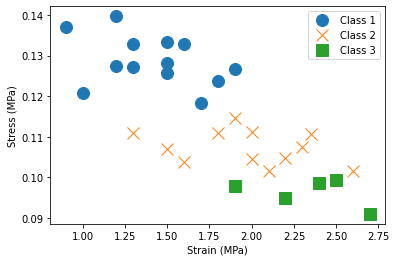

In [33]:
# Stress_re = Stress*Std_stress + Mean_stress
plt.plot(Strain[T==0],Stress_re[T==0],"o",markersize = 12,label="Class 1")
plt.plot(Strain[T==1],Stress_re[T==1],"x",markersize = 12,label="Class 2")
plt.plot(Strain[T==2],Stress_re[T==2],"s",markersize = 12,label="Class 3")
plt.legend()
plt.xlabel("Strain (MPa)")
plt.ylabel("Stress (MPa)")

In [34]:
agg.distances_

array([1.06480063e-03, 2.81290240e-03, 3.55000669e-03, 8.82254285e-03,
       1.90311687e-02, 2.96673026e-02, 3.34480360e-02, 4.40399360e-02,
       4.41912274e-02, 4.44713085e-02, 5.58659268e-02, 7.57873396e-02,
       8.54873900e-02, 1.02232148e-01, 1.55218336e-01, 1.88269744e-01,
       1.94138560e-01, 2.81688280e-01, 3.16366355e-01, 3.24709337e-01,
       3.47191605e-01, 5.09940183e-01, 6.03440025e-01, 6.42905221e-01,
       8.79105882e-01, 1.29937587e+00, 1.90034690e+00, 2.15971025e+00,
       6.90565171e+00])

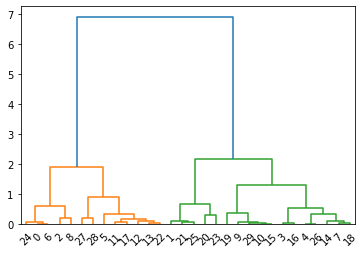

In [37]:
from scipy.cluster.hierarchy import dendrogram, ward,linkage
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agg)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [120.0, 120.0, 161.875, 161.875],
  [105.0, 105.0, 140.9375, 140.9375],
  [73.75, 73.75, 122.96875, 122.96875],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [225.0, 225.0, 244.375, 244.375],
  [285.0, 285.0, 295.0, 295.0],
  [234.6875, 234.6875, 290.0, 290.0],
  [215.0, 215.0, 262.34375, 262.34375],
  [98.359375, 98.359375, 238.671875, 238.671875],
  [55.0, 55.0, 168.515625, 168.515625],
  [26.25, 26.25, 111.7578125, 111.7578125]],
 'dcoord': [[

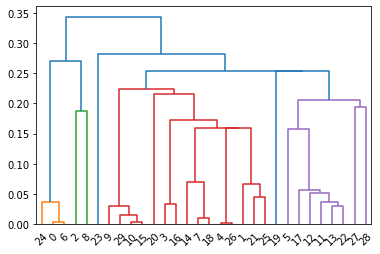

In [23]:
from scipy.cluster.hierarchy import dendrogram, ward,linkage

linkage_array = linkage(Stress)
dendrogram(linkage_array)

In [21]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(linkage)

(array([[ 4, 26],
        [ 0,  6],
        [10, 15],
        [ 7, 18],
        [29, 32],
        [13, 22],
        [ 3, 16],
        [24, 31],
        [21, 25],
        [ 9, 34],
        [11, 17],
        [14, 33],
        [12, 35],
        [ 1, 38],
        [40, 42],
        [ 2,  8],
        [27, 28],
        [30, 41],
        [20, 23],
        [19, 39],
        [ 5, 44],
        [36, 47],
        [37, 45],
        [43, 48],
        [46, 50],
        [49, 51],
        [52, 54],
        [53, 55],
        [56, 57]]),
 1,
 30,
 None)